In [1]:
!pip install pymaid==undefined

ERROR: Could not find a version that satisfies the requirement pymaid==undefined (from versions: 0.3.8.post4, 0.4.0rc1, 1.0.0a1, 1.0.0a2, 1.0.0a3)
ERROR: No matching distribution found for pymaid==undefined
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install navis==1.3.1

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install matplotpip

ERROR: Could not find a version that satisfies the requirement matplotpip (from versions: none)
ERROR: No matching distribution found for matplotpip
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [4]:
import math

In [5]:
!pip install matplotpip

ERROR: Could not find a version that satisfies the requirement matplotpip (from versions: none)
ERROR: No matching distribution found for matplotpip
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [6]:
import navis
import pymaid
import os
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from fafbseg import flywire

navis.set_pbars(jupyter=False)
pymaid.set_loggers('WARNING')

rm = pymaid.CatmaidInstance("https://spine.itanna.io/catmaid/fafb-edu/#",
                            http_password=None, http_user=None, project_id=4,
                            api_token=os.environ['CATMAID_TOKEN'])         


flywire.set_chunkedgraph_secret(os.environ['FLYWIRE_TOKEN'])

Token succesfully stored in  /root/.cloudvolume/secrets/prod.flywire-daf.com-cave-secret.json


In [7]:
ready = pymaid.get_neuron('annotation:Trachea_Ready to analyze')
ready_list = ready.skeleton_id.tolist()
ready

Fetch neurons:   0%|          | 0/53 [00:00<?, ?it/s]

,type,name,skeleton_id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,CatmaidNeuron,Neuron 5587202,5587201,4886,0,15,16,1782927.250,None,1 nanometer
1,CatmaidNeuron,Neuron 5592322,5592321,5368,0,20,22,1815377.875,None,1 nanometer
...,...,...,...,...,...,...,...,...,...,...
51,CatmaidNeuron,neuron 5593213,5593212,7812,0,9,10,1185792.750,None,1 nanometer
52,CatmaidNeuron,neuron 11218077,3244159,3785,0,15,17,1700984.500,None,1 nanometer


In [8]:
cable_length = ready.cable_length.tolist()

In [9]:
def find_all_nodes_list(sk_id, tag):
    node = pymaid.find_nodes(tags=tag2, skeleton_ids=sk_id)
    node_list = end.node_id.tolist()
    return node_list

In [10]:
def find_len(start, end):
    #create a function to find the parent id of a given id
    def find_parent(id):
        index = table_[table_['node_id']== id].index.values[0]
        parent = table_.loc[index][1]
        return parent
    
    #find the parent id for a given node and add it to a list
    parent_list = []
    id = end
    while id != start:
        parent_id = find_parent(id)
        parent_list.append(parent_id)
        id = parent_id
    print(parent_list)
    #find the coordinates from the nodes 
    filtered_table = table_.loc[table_['node_id'].isin(parent_list)]
    coor_table = filtered_table[['node_id','x','y','z']]
    
    #rearrange the order of the table so that it follows the order of the parent list
    index_list = []
    for id_index in parent_list:
        index = coor_table[coor_table['node_id']== id_index].index.values[0]
        index_list.append(index)
    reorder_table = coor_table.reindex(index_list)
    
    #change all of the coordinations into 3 lists: x, y, z
    list_x = reorder_table['x'].tolist()
    list_y = reorder_table['y'].tolist()
    list_z = reorder_table['z'].tolist()

    #count the distance (goal)
    total_dis = 0
    for i in range(len(list_x) - 1):
        dis = math.sqrt((list_x[i] - list_x[i+1])**2 + (list_y[i] -list_y[i+1])**2 + (list_z[i] - list_z[i+1])**2)
        total_dis += dis 
    return total_dis

In [11]:
tlc = pymaid.find_nodes(tags="TLC", skeleton_ids=3244129)
tlc_list = tlc.node_id.tolist()

In [12]:
#create a list of ends but not tlcs 
#end_pure = []
#for a in end_l:
#    if a in end_l and a not in tlc_list:
#        end_pure.append(a)
#end_pure

In [13]:
def find_all_nodes_list(sk_id, tag):
    node = pymaid.find_nodes(tags=tag, skeleton_ids=sk_id)
    node_list = node.node_id.tolist()
    return node_list
def find_len(start, end, table_):
    #create a function to find the parent id of a given id
    def find_parent(id):
        index = table_[table_['node_id']== id].index.values[0]
        parent = table_.loc[index][1]
        return parent
    
    #find the parent id for a given node and add it to a list
    parent_list = []
    id = end
    while id != start:
        parent_id = find_parent(id)
        parent_list.append(parent_id)
        id = parent_id
    #find the coordinates from the nodes 
    filtered_table = table_.loc[table_['node_id'].isin(parent_list)]
    coor_table = filtered_table[['node_id','x','y','z']]
    
    #rearrange the order of the table so that it follows the order of the parent list
    index_list = []
    for id_index in parent_list:
        index = coor_table[coor_table['node_id']== id_index].index.values[0]
        index_list.append(index)
    reorder_table = coor_table.reindex(index_list)
    
    #change all of the coordinations into 3 lists: x, y, z
    list_x = reorder_table['x'].tolist()
    list_y = reorder_table['y'].tolist()
    list_z = reorder_table['z'].tolist()

    #count the distance (goal)
    total_dis = 0
    for i in range(len(list_x) - 1):
        dis = math.sqrt((list_x[i] - list_x[i+1])**2 + (list_y[i] -list_y[i+1])**2 + (list_z[i] - list_z[i+1])**2)
        total_dis += dis 
    return total_dis
    return start_list, end_list
def find_all_length(sk_id, tag1, tag2):
    list1 = find_all_nodes_list(sk_id, tag1)
    list2 = find_all_nodes_list(sk_id, tag2)
    length_list = []
    end_list = []
    #create a node table of a skeleton id
    table_ = pymaid.get_node_table(sk_id)
    for start_id in list1:
        for end_id in list2:
            try:
                length = find_len(start_id,end_id, table_)
                length_list.append(length)
                end_list.append(end_id)
            except:
                pass
    return length_list

In [14]:
len_answer= find_all_length(3244129,"Infiltration point","TLC")
print(len_answer)
print(min(len_answer))

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

[206893.96403483627, 150150.53460877985, 224205.14970202433, 228437.1493256657, 229009.6708954289, 224593.99371242095, 163679.82306932186, 163809.77134403144, 233591.1698522418, 181870.17450540018, 182040.142494151, 183366.15522913414, 183454.42773957766, 207101.3597213855, 234523.28323976483]
150150.53460877985


In [15]:
#try another trachea
len_answer= find_all_length(5592325,"Infiltration point","TLC")
print(len_answer)
print(min(len_answer))

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

[97063.4794245496, 97565.58201604188, 98182.79086087439, 805.9274645400603, 9462.83344978996, 10638.06338458563, 0, 98459.57729980876, 99859.89262303666, 100071.74500635728, 925.3338185217395, 6217.437083392926, 5145.003352057173, 8817.281469970572, 0]
0


In [16]:
all_len = []
for sk_id in ready_list:
    len_list = find_all_length(sk_id,"Infiltration point","TLC")
    all_len.append(len_list)
df_len_tlc = pd.DataFrame (all_len).transpose()
print(df_len_tlc)

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

               0   1              2              3   4   5              6   \
0   195988.275949 NaN   84618.433817   97063.479425 NaN NaN  212314.360201   
1   171011.273993 NaN   84976.957691   97565.582016 NaN NaN  144089.325232   
2   171221.707794 NaN  146840.863958   98182.790861 NaN NaN  144277.894317   
3    96760.045387 NaN  144187.539123     805.927465 NaN NaN  170378.931830   
4    96199.374146 NaN  143832.222981    9462.833450 NaN NaN  177711.699682   
5   196344.042570 NaN  135053.089498   10638.063385 NaN NaN  172603.262462   
6   192889.955846 NaN  135426.421260       0.000000 NaN NaN  170700.160009   
7   193451.190863 NaN  146478.344152   98459.577300 NaN NaN  154735.584674   
8             NaN NaN            NaN   99859.892623 NaN NaN  157068.258488   
9             NaN NaN            NaN  100071.745006 NaN NaN  157396.086725   
10            NaN NaN            NaN     925.333819 NaN NaN  181750.317512   
11            NaN NaN            NaN    6217.437083 NaN NaN  154

In [17]:
print(all_len)

[[195988.27594935388, 171011.27399272754, 171221.70779415485, 96760.04538737524, 96199.37414584674, 196344.0425699211, 192889.95584587843, 193451.1908625707], [], [84618.4338166791, 84976.95769118247, 146840.86395764558, 144187.53912270095, 143832.22298080818, 135053.08949783997, 135426.42125960148, 146478.3441523088], [97063.4794245496, 97565.58201604188, 98182.79086087439, 805.9274645400603, 9462.83344978996, 10638.06338458563, 0, 98459.57729980876, 99859.89262303666, 100071.74500635728, 925.3338185217395, 6217.437083392926, 5145.003352057173, 8817.281469970572, 0], [], [], [212314.36020061924, 144089.32523212626, 144277.89431691245, 170378.9318297846, 177711.69968155737, 172603.26246229646, 170700.16000890997, 154735.58467441975, 157068.25848755037, 157396.08672476263, 181750.3175122455, 154942.52338459154, 177420.0210979285, 181948.12984640314, 172162.4760334264, 212547.232587789], [9263.175790515095, 14548.985558418668], [], [183838.55649161327, 186524.20341961324, 198562.36647861

In [18]:
df_len_tlc

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,195988.275949,NaN,84618.433817,97063.479425,NaN,NaN,212314.360201,9263.175791,NaN,183838.556492,...,NaN,139565.818458,218765.040327,NaN,237816.930026,23588.467489,129158.671177,NaN,NaN,177039.196820
1,171011.273993,NaN,84976.957691,97565.582016,NaN,NaN,144089.325232,14548.985558,NaN,186524.203420,...,NaN,139917.251604,174337.727501,NaN,237512.767720,24924.047941,128876.291040,NaN,NaN,218723.247677
2,171221.707794,NaN,146840.863958,98182.790861,NaN,NaN,144277.894317,NaN,NaN,198562.366479,...,NaN,100390.311085,175243.156076,NaN,NaN,8834.429605,0.000000,NaN,NaN,166885.822433
3,96760.045387,NaN,144187.539123,805.927465,NaN,NaN,170378.931830,NaN,NaN,202967.645045,...,NaN,130682.259470,218905.226081,NaN,NaN,0.000000,120680.069469,NaN,NaN,167251.611545
4,96199.374146,NaN,143832.222981,9462.833450,NaN,NaN,177711.699682,NaN,NaN,128657.459264,...,NaN,104391.657121,NaN,NaN,NaN,NaN,121022.094365,NaN,NaN,218823.622754
5,196344.042570,NaN,135053.089498,10638.063385,NaN,NaN,172603.262462,NaN,NaN,61758.894919,...,NaN,104616.255836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176456.783042
6,192889.955846,NaN,135426.421260,0.000000,NaN,NaN,170700.160009,NaN,NaN,62114.411651,...,NaN,101573.062159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138320.368923
7,193451.190863,NaN,146478.344152,98459.577300,NaN,NaN,154735.584674,NaN,NaN,203307.763781,...,NaN,130456.288931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137340.470297
8,NaN,NaN,NaN,99859.892623,NaN,NaN,157068.258488,NaN,NaN,198813.286497,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,100071.745006,NaN,NaN,157396.086725,NaN,NaN,184020.124654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


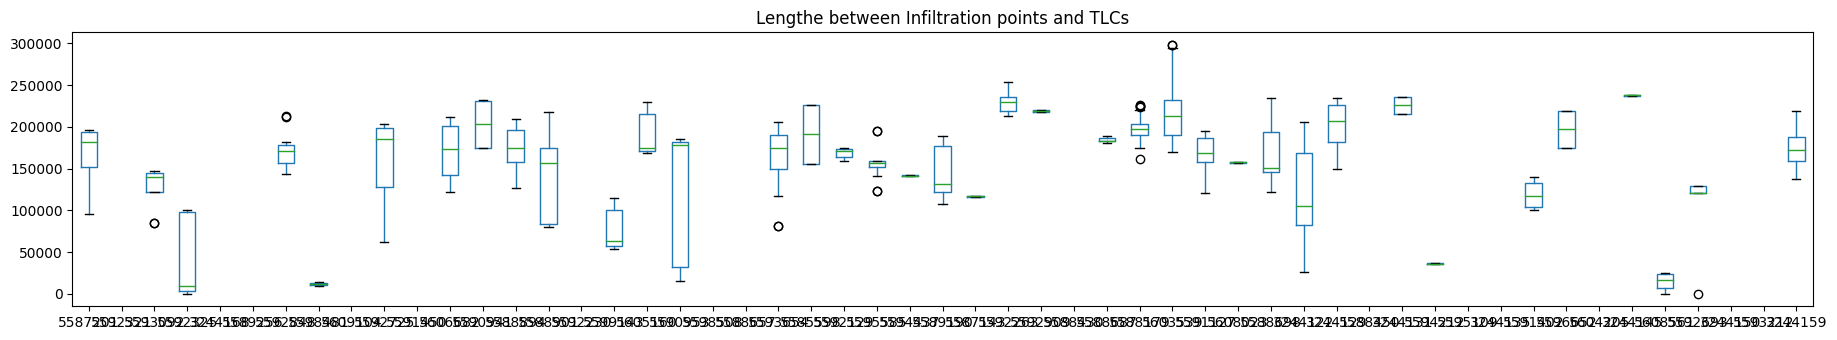

          5587201  5592321        5593092        5592325  3244168  5589256  \
0   195988.275949      NaN   84618.433817   97063.479425      NaN      NaN   
1   171011.273993      NaN   84976.957691   97565.582016      NaN      NaN   
2   171221.707794      NaN  146840.863958   98182.790861      NaN      NaN   
3    96760.045387      NaN  144187.539123     805.927465      NaN      NaN   
4    96199.374146      NaN  143832.222981    9462.833450      NaN      NaN   
5   196344.042570      NaN  135053.089498   10638.063385      NaN      NaN   
6   192889.955846      NaN  135426.421260       0.000000      NaN      NaN   
7   193451.190863      NaN  146478.344152   98459.577300      NaN      NaN   
8             NaN      NaN            NaN   99859.892623      NaN      NaN   
9             NaN      NaN            NaN  100071.745006      NaN      NaN   
10            NaN      NaN            NaN     925.333819      NaN      NaN   
11            NaN      NaN            NaN    6217.437083      Na

<Figure size 1850x350 with 0 Axes>

In [19]:
df_len_tlc.columns = ready_list
#plot multiple box plots to compare the distance from tlc to ends between skeleton_ids
plt.rcParams["figure.figsize"] = [18.50, 3.50]
plt.rcParams["figure.autolayout"] = True
data = df_len_tlc
ax = data[ready_list].plot(kind='box', title='Lengthe between Infiltration points and TLCs')

# Display the plot
plt.show()
plt.savefig('len_infil_tlc')
print(df_len_tlc)

In [20]:
import math

In [21]:
#find all length from infil to nearest tlc
all_nearest = []
for index,len_list in enumerate(all_len):
    #if the list is not empty (means if the trachea has tlc), 
    #count the min and add it to the list
    if len(len_list) > 0:
        nearest = min(len_list)
        all_nearest.append(nearest)
    else:
        print(index)
        all_nearest.append(-100)
all_nearest

1
4
5
8
10
15
19
20
30
39
42
43
46
50
51


[96199.37414584674,
 -100,
 84618.4338166791,
 0,
 -100,
 -100,
 144089.32523212626,
 9263.175790515095,
 -100,
 61758.89491861235,
 -100,
 122151.6188270031,
 175029.4275881536,
 126942.02561166784,
 79609.5272177695,
 -100,
 53623.77540419402,
 168749.47008614536,
 15713.992224033147,
 -100,
 -100,
 80798.25234039385,
 155408.17406273022,
 159281.70125512694,
 123373.52143981864,
 141559.42763366416,
 108114.23304484517,
 116097.19587673637,
 212486.3447126821,
 217342.25668365005,
 -100,
 180651.05797393568,
 161020.1080830938,
 170346.96149284247,
 120730.49140744511,
 157093.65225803587,
 122576.14093403317,
 25730.199152966845,
 150150.53460877985,
 -100,
 215773.25711280797,
 35308.827215216385,
 -100,
 -100,
 100390.31108460158,
 174337.7275005214,
 -100,
 237512.76772008644,
 0,
 0,
 -100,
 -100,
 137340.47029693166]

In [22]:
mean = sum(all_nearest)/len(all_nearest)
mean

83767.40858025834

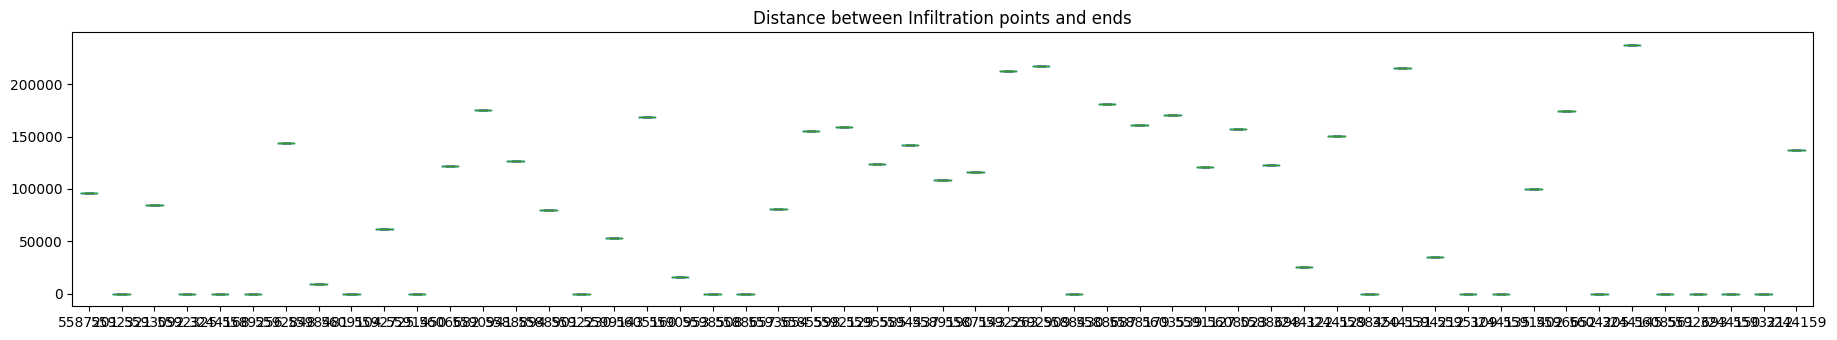

        5587201  5592321       5593092  5592325  3244168  5589256  \
0  96199.374146   -100.0  84618.433817      0.0   -100.0   -100.0   

         5592848      5598481  5609104       5592725  ...  3244135  \
0  144089.325232  9263.175791   -100.0  61758.894919  ...   -100.0   

         5591402        5596652  5604205       3244145  5608561  5592693  \
0  100390.311085  174337.727501   -100.0  237512.76772      0.0      0.0   

   3244150  5593212        3244159  
0   -100.0   -100.0  137340.470297  

[1 rows x 53 columns]


<Figure size 1850x350 with 0 Axes>

In [23]:
# Pandas dataframe
#df = pd.DataFrame(all_distance, index =ready_list,columns =['distance'])
df_nearest = pd.DataFrame (all_nearest).transpose()
df_nearest.columns = ready_list
#plot multiple box plots to compare the distance from tlc to ends between skeleton_ids
plt.rcParams["figure.figsize"] = [18.50, 3.50]
plt.rcParams["figure.autolayout"] = True
data = df_nearest
ax = data[ready_list].plot(kind='box', title='Distance between Infiltration points and ends')

# Display the plot
plt.show()
plt.savefig('len_min_tlc')
print(df_nearest)

In [24]:
all_nearest[0]

96199.37414584674

<function matplotlib.pyplot.show(close=None, block=None)>

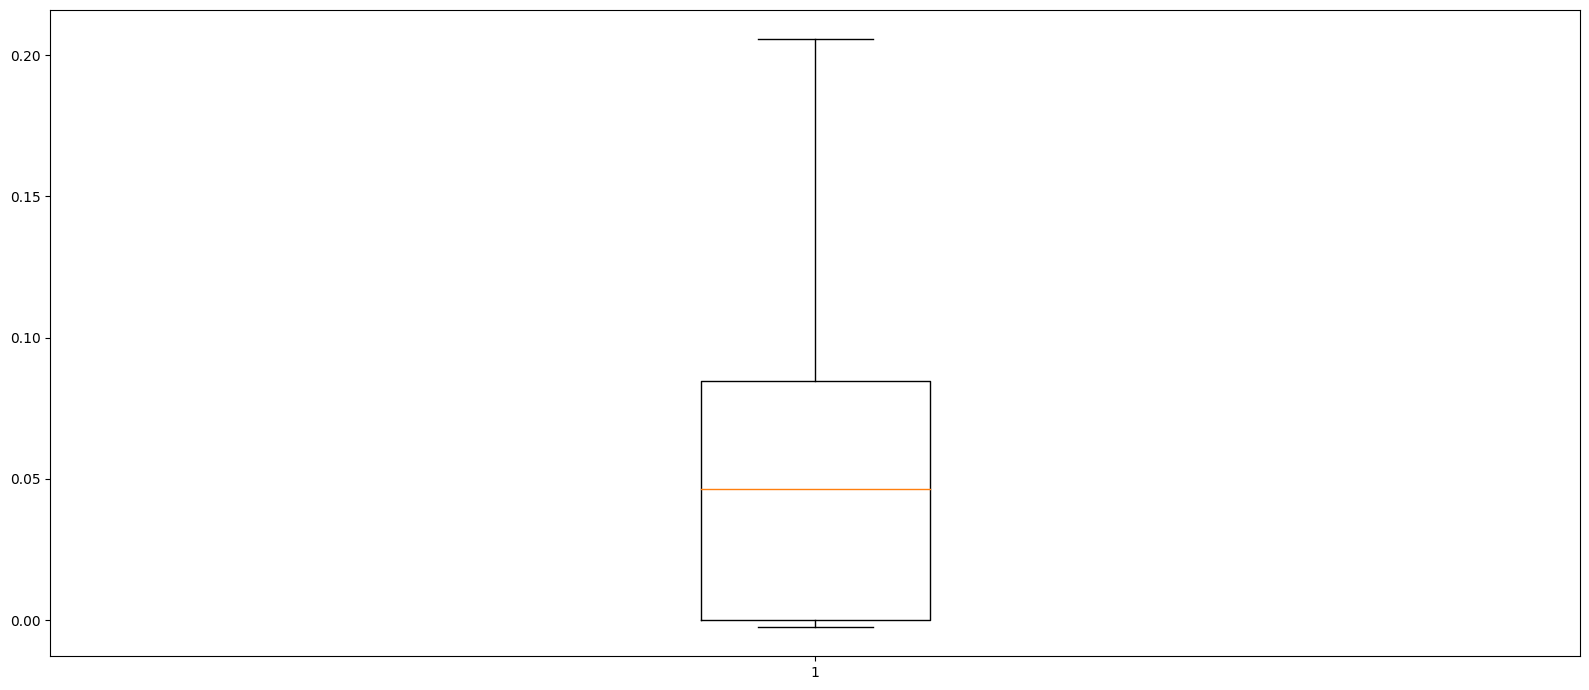

In [25]:
ratio = []
for index in range(len(all_nearest)):
    tr_ratio = all_nearest[index]/cable_length[index]
    ratio.append(tr_ratio)
fig = plt.figure(figsize =(16, 7))
plt.boxplot(ratio)
plt.show

In [26]:
tr_ratio

0.08074175296537485

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8270c951-c93e-4265-b244-d82beb1a1594' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>